<a href="https://colab.research.google.com/github/paulcodrea/reddit_humor/blob/main/Humour_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Get reddit /r/dadjokes data
import requests
import pandas as pd

url = "https://www.reddit.com/r/dadjokes.json"
resp = requests.get(url=url, headers = {'User-agent': 'Humour detection bot'})
data = resp.json()

In [26]:
df = pd.DataFrame(data['data']['children'])
df = df[['data']]

clean_df = pd.DataFrame()

clean_df['title'] = df['data'].apply(lambda x: x['title'])
clean_df['selftext'] = df['data'].apply(lambda x: x['selftext'])
clean_df['ups'] = df['data'].apply(lambda x: x['ups'])
clean_df['downs'] = df['data'].apply(lambda x: x['downs'])
clean_df['upvote_ratio'] = df['data'].apply(lambda x: x['upvote_ratio'])
clean_df['total_awards_received'] = df['data'].apply(lambda x: x['total_awards_received'])
# print(clean_df)

Number of jokes with upvotes different from zero:  25
Number of jokes with downvotes different from zero:  0


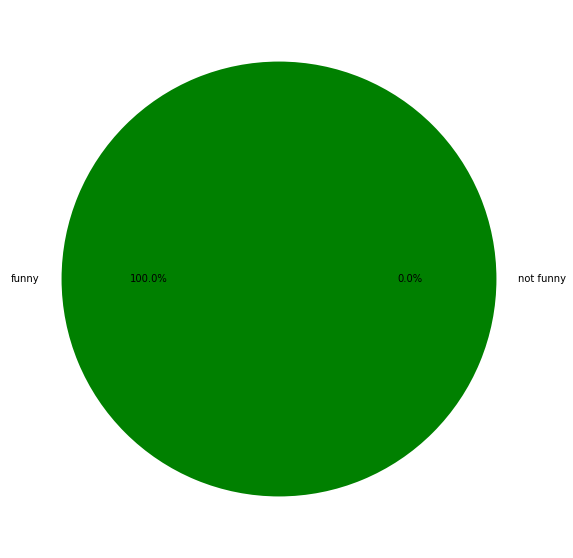

In [30]:
# print out as a pie chart how many jokes are funny or not
from matplotlib import pyplot as plt

# calculate number of posts with upvotes different grater than downvotes
funny = clean_df[clean_df['ups'] > clean_df['downs']]
not_funny = clean_df[clean_df['ups'] <= clean_df['downs']]

#calculate how many have only upvotes and zero downvotes
upvotes_count = downvotes_count = 0
for line in clean_df.iterrows():
    if int(line[1]['downs']) != 0:
        downvotes_count += 1
    elif int(line[1]['ups']) != 0:
        upvotes_count += 1

print("Number of jokes with upvotes different from zero: ", upvotes_count)
print("Number of jokes with downvotes different from zero: ", downvotes_count)


funny_percentage = len(funny) / len(clean_df) * 100
not_funny_percentage = len(not_funny) / len(clean_df) * 100

# set size of pie chart
plt.figure(figsize=(10,10))
plt.pie([funny_percentage, not_funny_percentage], labels=['funny', 'not funny'], autopct='%1.1f%%', colors=['green', 'red'])
plt.show()